In [1]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip "gdrive/MyDrive/Apparel_Dataset/data.zip" -d "/content/Data"

In [4]:
# This snippet increases the RAM to 25 GB FOR FREE 
# https://towardsdatascience.com/upgrade-your-memory-on-google-colab-for-free-1b8b18e8791d

# a = []
# while(1):
#     a.append('1')

In [3]:
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import PIL

In [4]:
print(tf.__version__)

2.4.1


**Exploratory Data** **Analysis**

The dataset consist of 11385 images and includes next categories:

black_dress: 450
black_pants: 871
black_shirt: 715
black_shoes: 766
black_shorts: 328
blue_dress: 502
blue_pants: 798
blue_shirt: 741
blue_shoes: 523
blue_shorts: 299
brown_pants: 311
brown_shoes: 464
brown_shorts: 40
green_pants: 227
green_shirt: 230
green_shoes: 455
green_shorts: 135
red_dress: 800
red_pants: 308
red_shoes: 610
white_dress: 818
white_pants: 274
white_shoes: 600
white_shorts: 120

In [5]:
data_dir = r'/content/Data'

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11385 files belonging to 24 classes.
Using 9108 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11385 files belonging to 24 classes.
Using 2277 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_pants', 'brown_shoes', 'brown_shorts', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'red_dress', 'red_pants', 'red_shoes', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts']


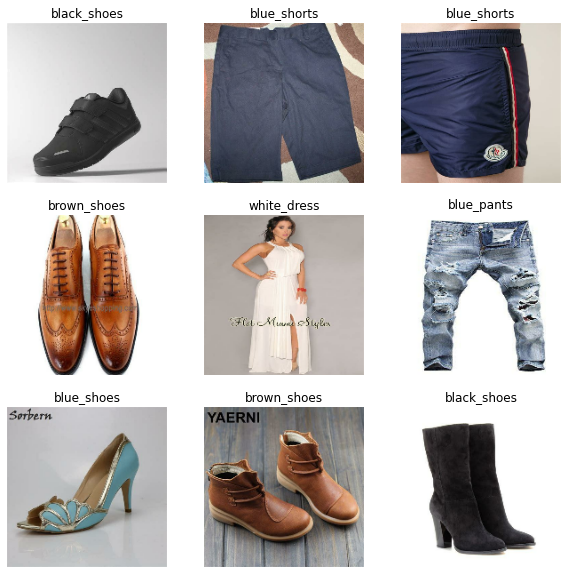

In [10]:
# Visualizing some images of each class

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 
# (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), 
# these are the corresponding labels to the 32 images.

(32, 180, 180, 3)
(32,)


Standardize the data

In [12]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
# This step lets you create a cache 

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Training the Neural Network **

In [ ]:
num_classes = 24

model = tf.keras.Sequential([
  normalization_layer,
  layers.Conv2D(16, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,padding='same' ,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,padding='same' , activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
285/285 [==============================] - 21s 72ms/step - loss: 2.1428 - accuracy: 0.4234 - val_loss: 0.7057 - val_accuracy: 0.7817
Epoch 2/10
285/285 [==============================] - 6s 20ms/step - loss: 0.6112 - accuracy: 0.8136 - val_loss: 0.6547 - val_accuracy: 0.8041
Epoch 3/10
285/285 [==============================] - 6s 20ms/step - loss: 0.3960 - accuracy: 0.8765 - val_loss: 0.6632 - val_accuracy: 0.8160
Epoch 4/10
285/285 [==============================] - 6s 20ms/step - loss: 0.2555 - accuracy: 0.9199 - val_loss: 0.7518 - val_accuracy: 0.8081
Epoch 5/10
285/285 [==============================] - 6s 20ms/step - loss: 0.1499 - accuracy: 0.9557 - val_loss: 0.8991 - val_accuracy: 0.7984
Epoch 6/10
285/285 [==============================] - 6s 20ms/step - loss: 0.1162 - accuracy: 0.9628 - val_loss: 0.8733 - val_accuracy: 0.8094
Epoch 7/10
285/285 [==============================] - 6s 20ms/step - loss: 0.0726 - accuracy: 0.9757 - val_loss: 0.9338 - val_accuracy: 0.823

In [31]:
import seaborn as sns

def Accuracy_Loss_plots(history):
  sns.set_style('darkgrid')
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


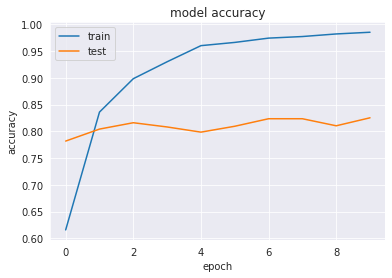

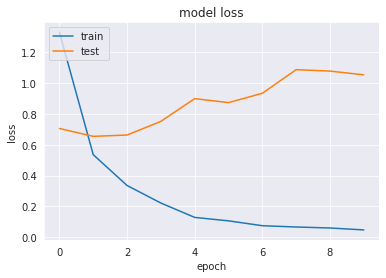

In [ ]:
Accuracy_Loss_plots(history)

From the above plots we can notice that the accuracy becomes stagnant after a few epochs and also the loss shows an increasing trend after a 2 epochs. This is a case of overfitting 

**Creating a Data Augmentation Generator **

In [16]:

data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [32]:
num_classes = 24

model = tf.keras.Sequential([
  data_augmentation,
  normalization_layer,
  layers.Conv2D(16, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,padding='same' ,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,padding='same' , activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [33]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
285/285 [==============================] - 27s 90ms/step - loss: 2.3985 - accuracy: 0.3130 - val_loss: 0.9960 - val_accuracy: 0.6781
Epoch 2/20
285/285 [==============================] - 26s 90ms/step - loss: 0.8884 - accuracy: 0.7120 - val_loss: 0.6922 - val_accuracy: 0.7958
Epoch 3/20
285/285 [==============================] - 26s 92ms/step - loss: 0.7008 - accuracy: 0.7732 - val_loss: 0.6854 - val_accuracy: 0.7892
Epoch 4/20
285/285 [==============================] - 26s 92ms/step - loss: 0.6082 - accuracy: 0.8065 - val_loss: 0.6794 - val_accuracy: 0.7923
Epoch 5/20
285/285 [==============================] - 26s 91ms/step - loss: 0.5455 - accuracy: 0.8228 - val_loss: 0.5750 - val_accuracy: 0.8186
Epoch 6/20
285/285 [==============================] - 26s 90ms/step - loss: 0.5134 - accuracy: 0.8406 - val_loss: 0.5146 - val_accuracy: 0.8432
Epoch 7/20
285/285 [==============================] - 26s 91ms/step - loss: 0.5159 - accuracy: 0.8360 - val_loss: 0.4891 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


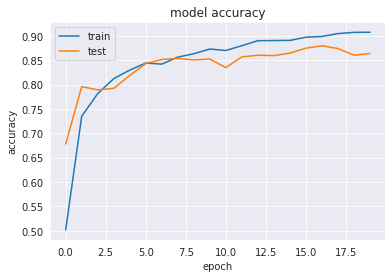

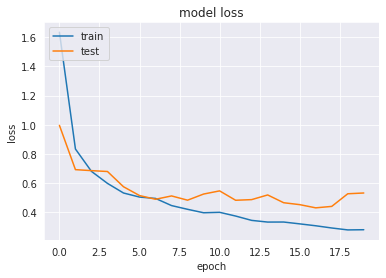

In [34]:
Accuracy_Loss_plots(history)

In [16]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


     |████████████████████████████████| 1.0MB 27.2MB/s 


In [54]:
# Use different techniques more regularisation , callbacks etc to make the training fast and increase accuracy

STEPS_PER_EPOCH = 285

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

def get_callback():
  
  return tf.keras.callbacks.EarlyStopping(
         monitor='val_loss', patience=5, verbose=0)

In [55]:
num_classes = 24
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
  data_augmentation,
  normalization_layer,
  layers.Conv2D(16, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,padding='same' ,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,padding='same' , activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(
  optimizer=get_optimizer(),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [56]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=get_callback())

Epoch 1/20
285/285 [==============================] - 7s 22ms/step - loss: 2.1244 - accuracy: 0.3863 - val_loss: 0.9010 - val_accuracy: 0.7189
Epoch 2/20
285/285 [==============================] - 6s 22ms/step - loss: 0.8418 - accuracy: 0.7364 - val_loss: 0.7016 - val_accuracy: 0.7826
Epoch 3/20
285/285 [==============================] - 6s 22ms/step - loss: 0.6643 - accuracy: 0.7907 - val_loss: 0.6466 - val_accuracy: 0.8028
Epoch 4/20
285/285 [==============================] - 6s 22ms/step - loss: 0.5842 - accuracy: 0.8154 - val_loss: 0.6078 - val_accuracy: 0.8134
Epoch 5/20
285/285 [==============================] - 6s 22ms/step - loss: 0.5019 - accuracy: 0.8412 - val_loss: 0.5544 - val_accuracy: 0.8296
Epoch 6/20
285/285 [==============================] - 6s 22ms/step - loss: 0.4656 - accuracy: 0.8497 - val_loss: 0.5010 - val_accuracy: 0.8388
Epoch 7/20
285/285 [==============================] - 6s 22ms/step - loss: 0.4185 - accuracy: 0.8657 - val_loss: 0.5013 - val_accuracy: 0.8379

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


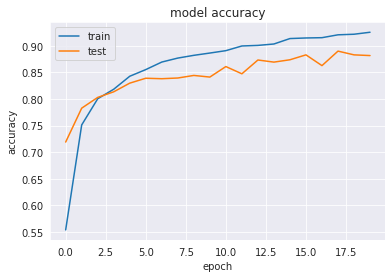

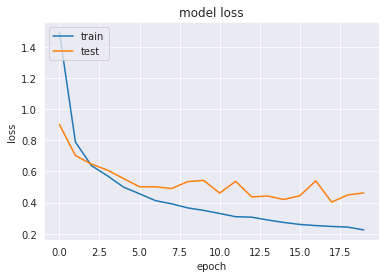

In [57]:
Accuracy_Loss_plots(history)